# Import Package

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.simplefilter(action='ignore')
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

# Load Data

In [3]:
df = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
print(f"there are have {df.shape[0]} rows")
print(f"there are have {df.shape[1]} columns")

there are have 4340 rows
there are have 8 columns


In [5]:
print(f"name of columns : {df.columns.tolist()}")

name of columns : ['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner']


# Data Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [7]:
#Statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,4340.0,2013.090783,4.215344,1992.0,2011.00,2014.0,2016.0,2020.0
selling_price,4340.0,504127.311751,578548.736139,20000.0,208749.75,350000.0,600000.0,8900000.0
km_driven,4340.0,66215.777419,46644.102194,1.0,35000.00,60000.0,90000.0,806599.0


In [8]:
#Check Missing Values
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [9]:
#Check duplicated values
df.duplicated().sum()

763

In [10]:
#Remove duplicated values
df.drop_duplicates(inplace = True)
df.shape

(3577, 8)

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Selling Price')

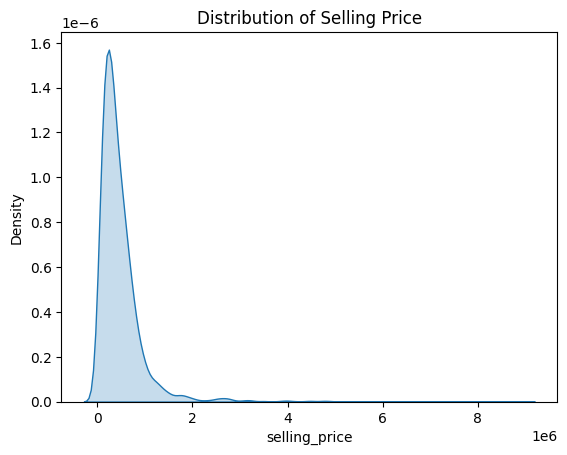

In [11]:
ax = sns.kdeplot(data = df, x = "selling_price", fill = True)
ax.set_title("Distribution of Selling Price")

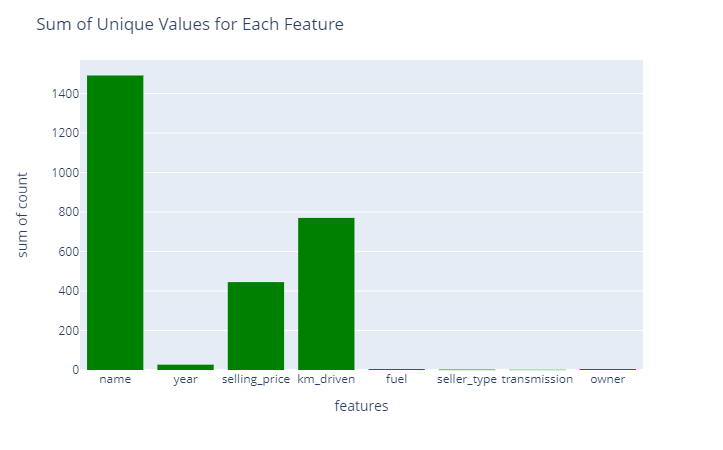

In [12]:
#Check unique values
df_unique = df.nunique().reset_index()
df_unique = df_unique.rename({"index" : "features",
                             0:"count"}, axis = 1)
fig = px.histogram(data_frame = df_unique, x = "features", y = "count", text_auto = True)
fig.update_layout(title = "Sum of Unique Values for Each Feature")
fig.update_traces(marker = dict(color = "green"))
fig.show()

## Visualize Categorical Features

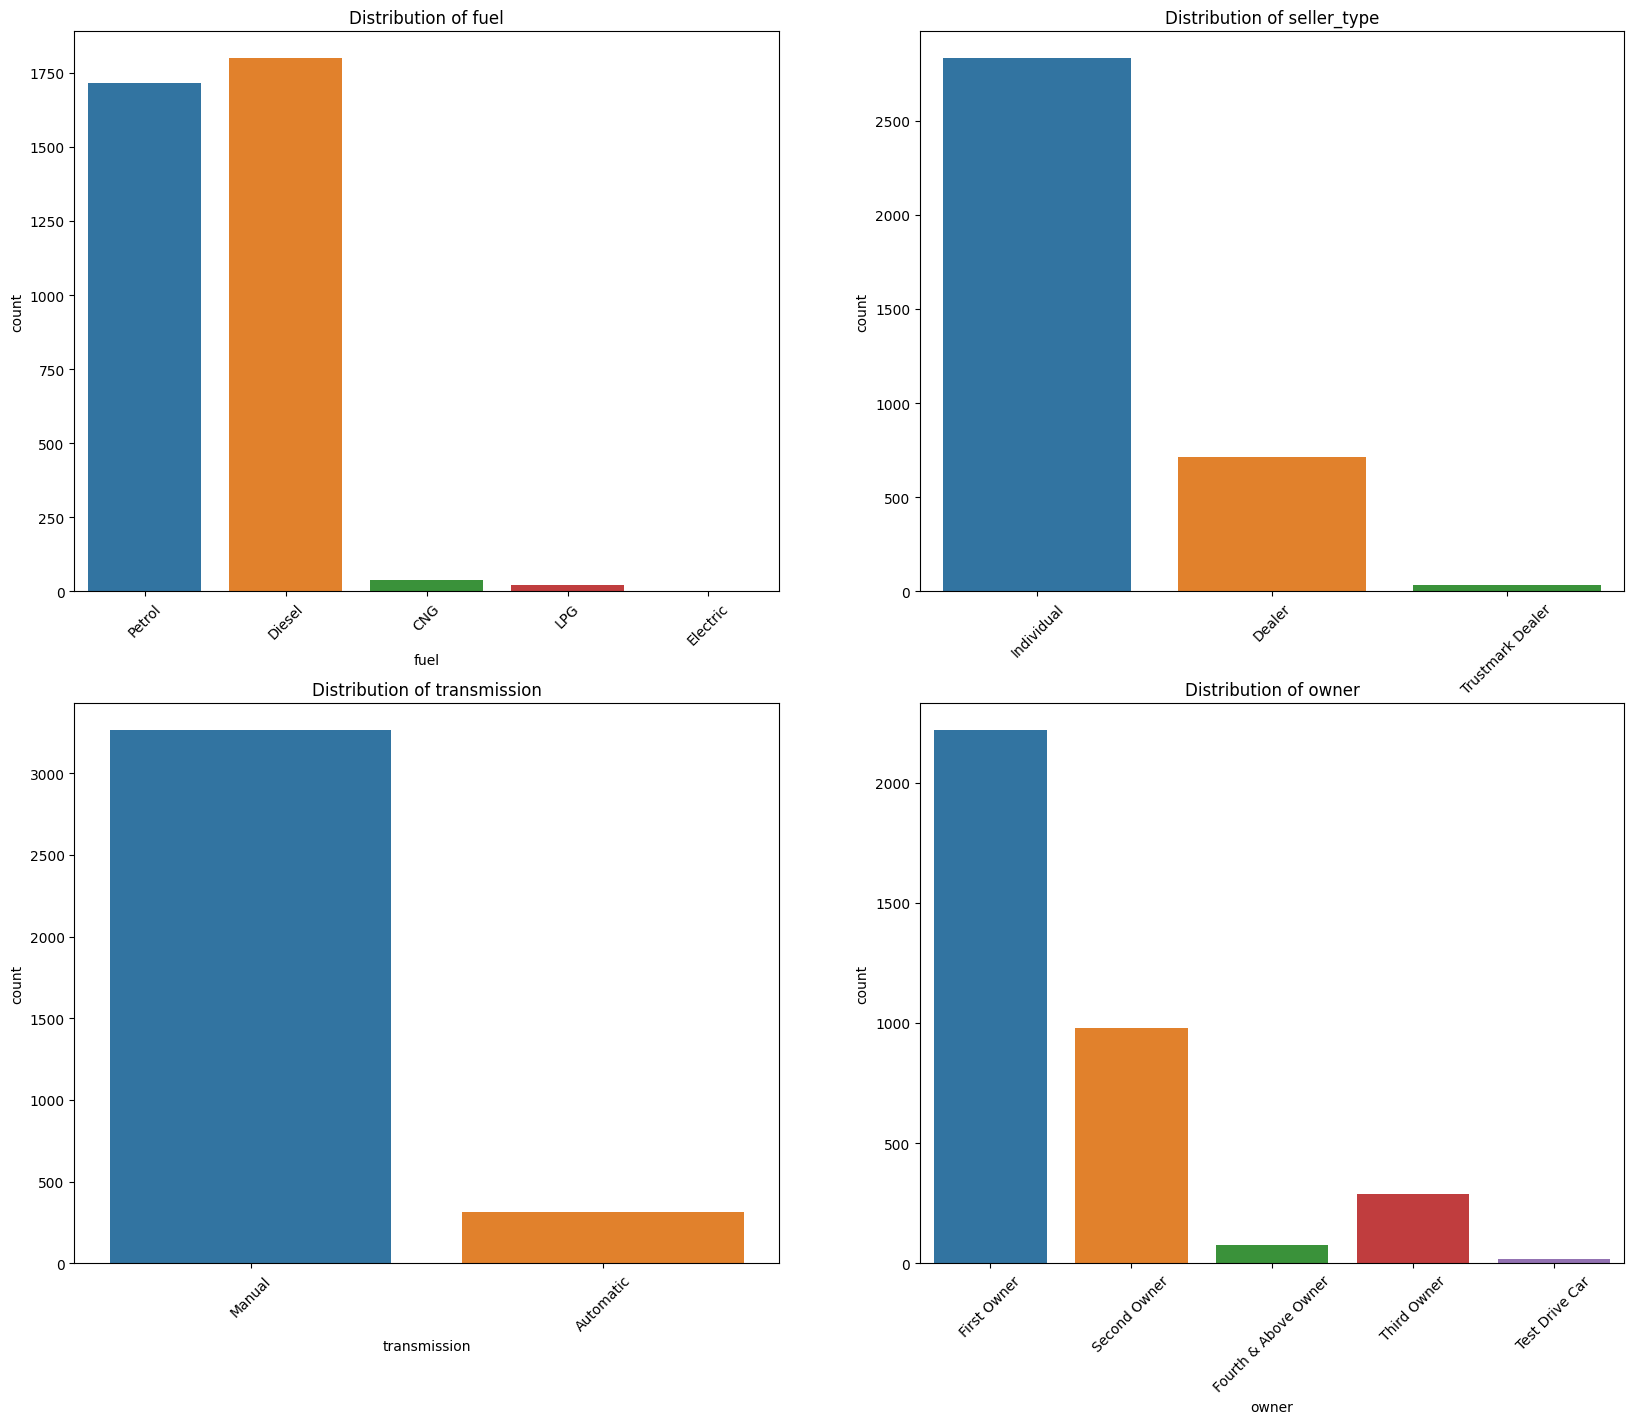

In [13]:
cat_cols = ["fuel", "seller_type", "transmission", "owner"]
num_of_columns = 2
num_of_rows = 2

fig = plt.figure(figsize = (20,16))
for idx, column in enumerate(cat_cols,1):
    ax = fig.add_subplot(num_of_rows,num_of_columns, idx)
    ax = sns.countplot(x = column, data = df)
    ax.set_title(f"Distribution of {column}")
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.show()

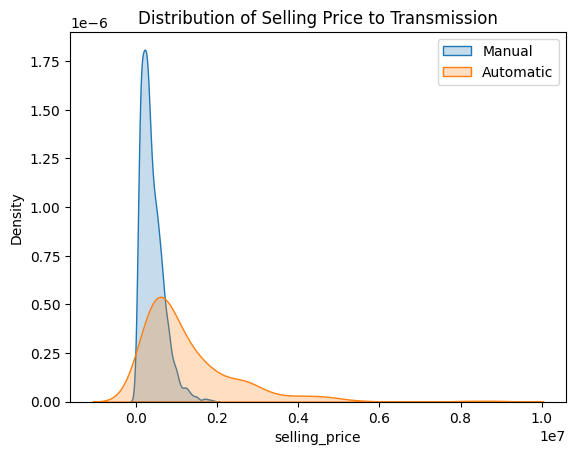

In [14]:
#Transmission to selling price
ax = sns.kdeplot(df["selling_price"][df["transmission"]=="Manual"], fill = True)
ax = sns.kdeplot(df["selling_price"][df["transmission"]=="Automatic"], fill = True)
ax.set_title("Distribution of Selling Price to Transmission")
ax.legend(["Manual","Automatic"])
plt.show()

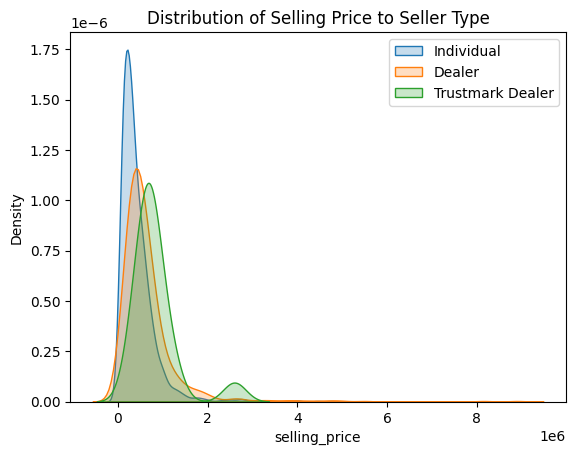

In [15]:
#Transmission to selling price
ax = sns.kdeplot(df["selling_price"][df["seller_type"]=="Individual"], fill = True)
ax = sns.kdeplot(df["selling_price"][df["seller_type"]=="Dealer"], fill = True)
ax = sns.kdeplot(df["selling_price"][df["seller_type"]=="Trustmark Dealer"], fill = True)
ax.set_title("Distribution of Selling Price to Seller Type")
ax.legend(["Individual","Dealer","Trustmark Dealer"])
plt.show()

## Visualize Numerical Features

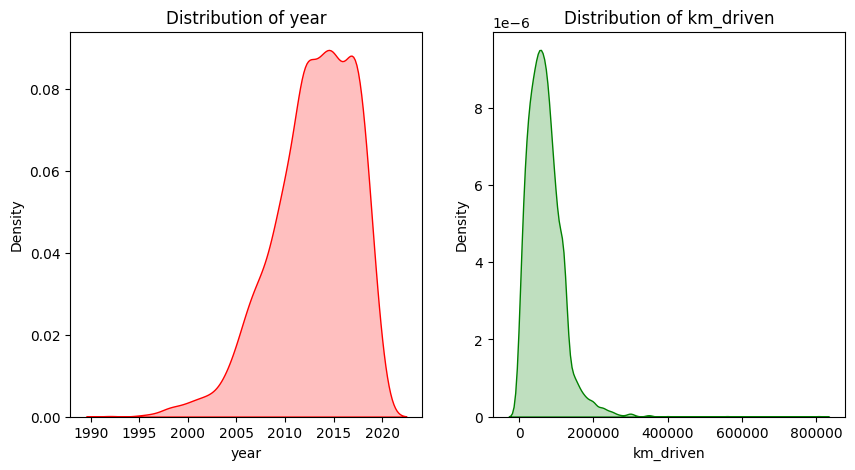

In [16]:
num_cols = ["year", "km_driven"]
colors = ["red", "green"]
fig = plt.figure(figsize = (10,5))
for idx,column, color in zip(range(1,3), num_cols, colors):
    ax = fig.add_subplot(1,2,idx)
    ax = sns.kdeplot(data = df, x = column, fill = True, color = color)
    ax.set_title(f"Distribution of {column}")
plt.show()

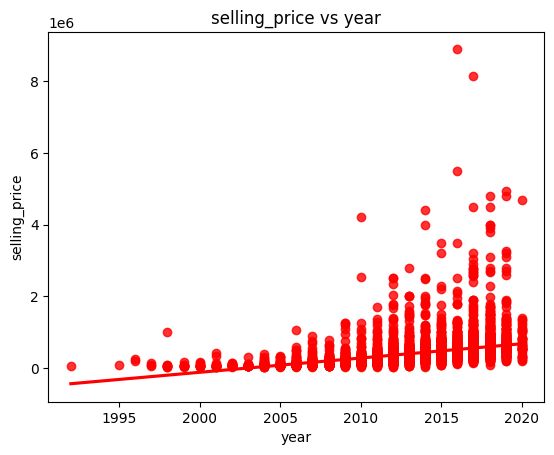

In [17]:
ax = sns.regplot(data = df, x = "year", y = "selling_price", robust = True, color = "red",)
ax.set_title("selling_price vs year")
plt.show()

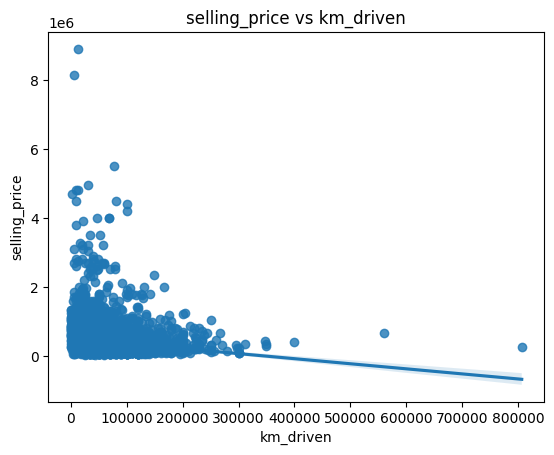

In [18]:
ax = sns.regplot(data = df, x = "km_driven", y = "selling_price", robust = True)
ax.set_title("selling_price vs km_driven")
plt.show()

## Correlation Analysis

In [19]:
def encode_label(df_series):
    if df_series.dtype == "object":
        df_series = LabelEncoder().fit_transform(df_series)
    return df_series

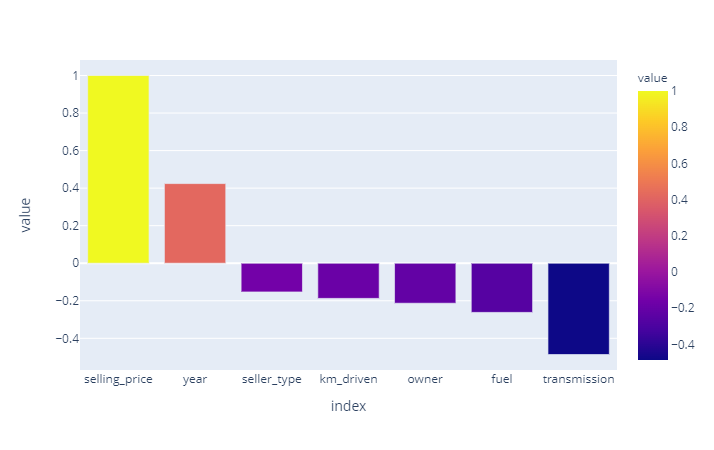

In [20]:
df_new = df.drop("name", axis = 1)
df_new = df_new.apply(lambda x : encode_label(x))

fig = px.bar(df_new.corr()["selling_price"].sort_values(ascending = False), color = "value")
fig.show()

# Data Preprocessing

## Feature Scaling

In [21]:
df_prep = df.copy()
df_prep = df_prep.drop("name", axis = 1)

In [22]:
num_cols = ["selling_price","year", "km_driven"]
for column in num_cols:
    df_prep[column] = np.log1p(df_prep[column].values)
df_prep.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,7.604894,11.002117,11.156265,Petrol,Individual,Manual,First Owner
1,7.604894,11.813037,10.819798,Petrol,Individual,Manual,First Owner
2,7.607381,13.304687,11.512935,Diesel,Individual,Manual,First Owner
3,7.609862,12.429220,10.736418,Petrol,Individual,Manual,First Owner
4,7.608374,13.017005,11.856522,Diesel,Individual,Manual,Second Owner


## One Hot Encoding

In [23]:
df_prep = pd.get_dummies(data = df_prep, drop_first = True)
df_prep.head()

,year,selling_price,km_driven,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,7.604894,11.002117,11.156265,False,False,False,True,True,False,True,False,False,False,False
1,7.604894,11.813037,10.819798,False,False,False,True,True,False,True,False,False,False,False
2,7.607381,13.304687,11.512935,True,False,False,False,True,False,True,False,False,False,False
3,7.609862,12.429220,10.736418,False,False,False,True,True,False,True,False,False,False,False
4,7.608374,13.017005,11.856522,True,False,False,False,True,False,True,False,True,False,False


# Train Test Split

In [24]:
X = df_prep.drop("selling_price", axis = 1)
y = df_prep["selling_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2861, 13), (2861,), (716, 13), (716,))

# Modeling

In [25]:
models = [("Linear Regression", LinearRegression()),
         ("Support Vector Regression", SVR()),
         ("Ridge Regression", Ridge()),
         ("Lasso Regression", Lasso())]

In [26]:
def scoring_model(models,X_train, y_train, X_test, y_test):
    name_models = []
    r2_scores = []
    mses = []
    for name_model, model in models:
        model.fit(X_train, y_train)
        test_pred = model.predict(X_test)
        r2 = r2_score(np.expm1(y_test), np.expm1(test_pred))
        mse = mean_squared_error(y_test, test_pred)
        name_models.append(name_model)
        r2_scores.append(r2)
        mses.append(mse)
    df = pd.DataFrame({"Model" : name_models,
                      "r2_score" : r2_scores,
                      "mse" : mses})
    return df

In [27]:
df_results = scoring_model(models, X_train, y_train, X_test, y_test)
df_results

,Model,r2_score,mse
0,Linear Regression,0.453952,0.216691
1,Support Vector Regression,0.394215,0.332720
2,Ridge Regression,0.419573,0.329422
3,Lasso Regression,-0.065341,0.685743


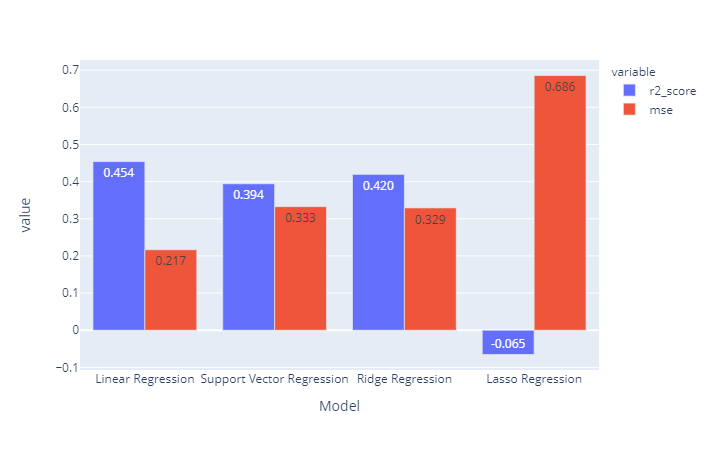

In [28]:
fig = px.bar(data_frame = df_results, x = "Model", y = ["r2_score", "mse"],
            barmode = "group",
            text_auto = ".3f")
fig.show()

In [41]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
import torch.optim as optim
from tqdm import tqdm, tqdm_notebook

# 1. Custom Dataset

In [42]:
class CarPriceData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = torch.from_numpy(X_data.to_numpy().astype(np.float64)).float()
        self.y_data = torch.from_numpy(y_data.to_numpy()).float()
    
    def __len__(self):
        return len(self.X_data)
    
    def __getitem__(self, idx):
        return self.X_data[idx], self.y_data[idx]

In [43]:
train_data = CarPriceData(X_train, y_train)
test_data = CarPriceData(X_test, y_test)

In [44]:
train_loader = DataLoader(dataset = train_data, batch_size=32, shuffle = True)
test_loader = DataLoader(dataset = test_data, batch_size=32)

In [51]:
X_train,y_train = next(iter(train_loader))
X_train.shape

torch.Size([32, 13])

## Create Neural Network Model

In [52]:
class RegressionModel(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.layer_1 = nn.Linear(num_features, 16)
        self.layer_2 = nn.Linear(16,32)
        self.layer_3 = nn.Linear(32,64)
        self.layer_out = nn.Linear(64,1)
        
        self.act = nn.ReLU()
    def forward(self, x):
        x = self.act(self.layer_1(x))
        x = self.act(self.layer_2(x))
        x = self.act(self.layer_3(x))
        x = self.layer_out(x)
        return x

In [56]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [54]:
num_features = X_train.shape[1]
model = RegressionModel(num_features)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [55]:
num_features

13

In [57]:
cost_train = []
cost_test = []
epochs = 100
model = model.to(device)
for epoch in tqdm(range(epochs), desc = "Epoch"):
    model.train()
    cost = 0
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch = X_train_batch.to(device)
        y_train_batch = y_train_batch.to(device)
        #Zero gradient for every batch
        optimizer.zero_grad()
        #Feed Forward
        pred = model(X_train_batch)
        #Compute loss
        loss_train = criterion(pred, y_train_batch.unsqueeze(1))
        #Compute gradient loss
        loss_train.backward()
        #Adjust learning weights
        optimizer.step()
        cost += loss_train.item()
    cost_train.append(cost/len(train_loader))
    cost = 0
    model.eval()
    for X_test_batch, y_test_batch in test_loader:
        X_test_batch = X_test_batch.to(device)
        y_test_batch = y_test_batch.to(device)
        prediction = model(X_test_batch)
        loss_test = criterion(pred, y_test_batch)
        cost += loss_test.item()
    cost_test.append(cost/len(test_loader))
    print(f"\rEpoch {epoch+1}/{epochs} | loss_train : {cost_train[epoch]:.3} | test_loss : {cost_test[epoch]:.3}", end = " ")

Epoch:   2%|▏         | 2/100 [00:00<00:38,  2.56it/s]

Epoch 2/100 | loss_train : 1.51e+02 | test_loss : 1.43e+02 

Epoch:   4%|▍         | 4/100 [00:01<00:24,  3.88it/s]

Epoch 4/100 | loss_train : 1.03e+02 | test_loss : 83.7 +02 

Epoch:   6%|▌         | 6/100 [00:01<00:20,  4.52it/s]

Epoch 6/100 | loss_train : 26.6 | test_loss : 12.7 

Epoch:   8%|▊         | 8/100 [00:02<00:19,  4.84it/s]

Epoch 8/100 | loss_train : 2.13 | test_loss : 1.78 

Epoch:  10%|█         | 10/100 [00:02<00:18,  4.95it/s]

Epoch 10/100 | loss_train : 1.72 | test_loss : 1.25 

Epoch:  12%|█▏        | 12/100 [00:02<00:17,  5.09it/s]

Epoch 12/100 | loss_train : 1.68 | test_loss : 1.35  

Epoch:  14%|█▍        | 14/100 [00:03<00:16,  5.09it/s]

Epoch 14/100 | loss_train : 1.62 | test_loss : 1.14 

Epoch:  16%|█▌        | 16/100 [00:03<00:16,  5.09it/s]

Epoch 16/100 | loss_train : 1.58 | test_loss : 1.44 

Epoch:  18%|█▊        | 18/100 [00:03<00:15,  5.17it/s]

Epoch 18/100 | loss_train : 1.52 | test_loss : 0.894 

Epoch:  20%|██        | 20/100 [00:04<00:15,  5.14it/s]

Epoch 20/100 | loss_train : 1.46 | test_loss : 1.62 

Epoch:  22%|██▏       | 22/100 [00:04<00:15,  5.12it/s]

Epoch 22/100 | loss_train : 1.4 | test_loss : 1.37  

Epoch:  24%|██▍       | 24/100 [00:05<00:14,  5.13it/s]

Epoch 24/100 | loss_train : 1.32 | test_loss : 1.16 

Epoch:  26%|██▌       | 26/100 [00:05<00:14,  5.12it/s]

Epoch 26/100 | loss_train : 1.25 | test_loss : 1.13 

Epoch:  28%|██▊       | 28/100 [00:05<00:13,  5.18it/s]

Epoch 28/100 | loss_train : 1.18 | test_loss : 1.44 

Epoch:  30%|███       | 30/100 [00:06<00:13,  5.17it/s]

Epoch 30/100 | loss_train : 1.1 | test_loss : 0.985  

Epoch:  32%|███▏      | 32/100 [00:06<00:13,  5.12it/s]

Epoch 32/100 | loss_train : 0.989 | test_loss : 0.924 

Epoch:  34%|███▍      | 34/100 [00:07<00:12,  5.10it/s]

Epoch 34/100 | loss_train : 0.902 | test_loss : 0.94 

Epoch:  36%|███▌      | 36/100 [00:07<00:12,  5.10it/s]

Epoch 36/100 | loss_train : 0.83 | test_loss : 1.01 2 

Epoch:  38%|███▊      | 38/100 [00:07<00:12,  5.16it/s]

Epoch 38/100 | loss_train : 0.769 | test_loss : 0.887 

Epoch:  40%|████      | 40/100 [00:08<00:11,  5.17it/s]

Epoch 40/100 | loss_train : 0.724 | test_loss : 0.812 

Epoch:  42%|████▏     | 42/100 [00:08<00:11,  5.17it/s]

Epoch 42/100 | loss_train : 0.68 | test_loss : 1.01  

Epoch:  44%|████▍     | 44/100 [00:09<00:10,  5.20it/s]

Epoch 44/100 | loss_train : 0.645 | test_loss : 0.973 

Epoch:  46%|████▌     | 46/100 [00:09<00:10,  5.17it/s]

Epoch 46/100 | loss_train : 0.615 | test_loss : 0.967 

Epoch:  48%|████▊     | 48/100 [00:09<00:10,  5.19it/s]

Epoch 48/100 | loss_train : 0.585 | test_loss : 0.932 

Epoch:  50%|█████     | 50/100 [00:10<00:09,  5.17it/s]

Epoch 50/100 | loss_train : 0.56 | test_loss : 0.912 

Epoch:  51%|█████     | 51/100 [00:10<00:09,  5.13it/s]

Epoch 51/100 | loss_train : 0.537 | test_loss : 0.889 

Epoch:  53%|█████▎    | 53/100 [00:10<00:09,  5.06it/s]

Epoch 53/100 | loss_train : 0.51 | test_loss : 1.0 38 

Epoch:  55%|█████▌    | 55/100 [00:11<00:08,  5.13it/s]

Epoch 55/100 | loss_train : 0.487 | test_loss : 1.06 

Epoch:  57%|█████▋    | 57/100 [00:11<00:08,  5.18it/s]

Epoch 57/100 | loss_train : 0.467 | test_loss : 1.08 

Epoch:  59%|█████▉    | 59/100 [00:11<00:07,  5.26it/s]

Epoch 59/100 | loss_train : 0.451 | test_loss : 1.24 

Epoch:  61%|██████    | 61/100 [00:12<00:07,  5.27it/s]

Epoch 61/100 | loss_train : 0.433 | test_loss : 0.825 

Epoch:  63%|██████▎   | 63/100 [00:12<00:07,  5.26it/s]

Epoch 63/100 | loss_train : 0.419 | test_loss : 1.15  

Epoch:  65%|██████▌   | 65/100 [00:13<00:06,  5.25it/s]

Epoch 65/100 | loss_train : 0.408 | test_loss : 1.01  

Epoch:  66%|██████▌   | 66/100 [00:13<00:06,  5.21it/s]

Epoch 66/100 | loss_train : 0.405 | test_loss : 0.906 

Epoch:  67%|██████▋   | 67/100 [00:13<00:06,  5.01it/s]

Epoch 67/100 | loss_train : 0.403 | test_loss : 0.97 

Epoch:  68%|██████▊   | 68/100 [00:13<00:06,  4.86it/s]

Epoch 68/100 | loss_train : 0.397 | test_loss : 0.812 

Epoch:  69%|██████▉   | 69/100 [00:13<00:06,  4.81it/s]

Epoch 69/100 | loss_train : 0.394 | test_loss : 0.929 

Epoch:  70%|███████   | 70/100 [00:14<00:06,  4.79it/s]

Epoch 70/100 | loss_train : 0.389 | test_loss : 0.915 

Epoch:  71%|███████   | 71/100 [00:14<00:06,  4.77it/s]

Epoch 71/100 | loss_train : 0.388 | test_loss : 1.03 

Epoch:  72%|███████▏  | 72/100 [00:14<00:05,  4.77it/s]

Epoch 72/100 | loss_train : 0.386 | test_loss : 0.902 

Epoch:  74%|███████▍  | 74/100 [00:14<00:05,  4.85it/s]

Epoch 74/100 | loss_train : 0.381 | test_loss : 1.17  

Epoch:  76%|███████▌  | 76/100 [00:15<00:04,  4.99it/s]

Epoch 76/100 | loss_train : 0.375 | test_loss : 0.933 

Epoch:  78%|███████▊  | 78/100 [00:15<00:04,  5.09it/s]

Epoch 78/100 | loss_train : 0.376 | test_loss : 0.996 

Epoch:  80%|████████  | 80/100 [00:16<00:03,  5.13it/s]

Epoch 80/100 | loss_train : 0.37 | test_loss : 0.862  

Epoch:  82%|████████▏ | 82/100 [00:16<00:03,  5.14it/s]

Epoch 82/100 | loss_train : 0.371 | test_loss : 1.1 1 

Epoch:  84%|████████▍ | 84/100 [00:16<00:03,  5.16it/s]

Epoch 84/100 | loss_train : 0.368 | test_loss : 1.18  

Epoch:  86%|████████▌ | 86/100 [00:17<00:02,  5.18it/s]

Epoch 86/100 | loss_train : 0.364 | test_loss : 1.06 

Epoch:  88%|████████▊ | 88/100 [00:17<00:02,  5.18it/s]

Epoch 88/100 | loss_train : 0.364 | test_loss : 0.956 

Epoch:  90%|█████████ | 90/100 [00:18<00:01,  5.17it/s]

Epoch 90/100 | loss_train : 0.365 | test_loss : 1.02  

Epoch:  92%|█████████▏| 92/100 [00:18<00:01,  5.12it/s]

Epoch 92/100 | loss_train : 0.364 | test_loss : 0.974 

Epoch:  94%|█████████▍| 94/100 [00:18<00:01,  5.13it/s]

Epoch 94/100 | loss_train : 0.365 | test_loss : 1.2 1 

Epoch:  96%|█████████▌| 96/100 [00:19<00:00,  5.11it/s]

Epoch 96/100 | loss_train : 0.361 | test_loss : 0.829 

Epoch:  98%|█████████▊| 98/100 [00:19<00:00,  5.13it/s]

Epoch 98/100 | loss_train : 0.363 | test_loss : 0.951 

Epoch: 100%|██████████| 100/100 [00:20<00:00,  5.00it/s]

Epoch 100/100 | loss_train : 0.359 | test_loss : 0.903 

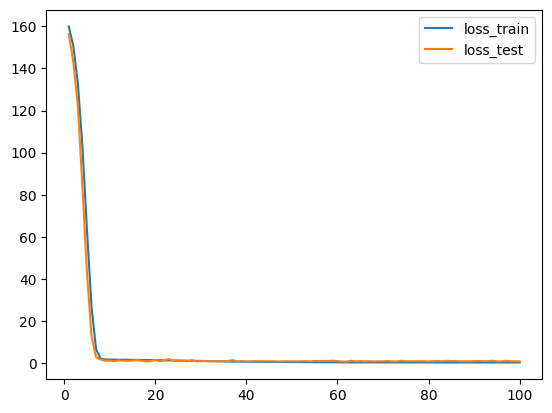

In [59]:
tes = np.arange(1,100+1)
plt.plot(tes, cost_train, label="loss_train")
plt.plot(tes, cost_test, label="loss_test")
plt.legend()